In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Data Collection

In [3]:
wine_dataset = pd.read_csv("dataset/winequality-red.csv")

In [11]:
wine_dataset.shape

(1599, 12)

In [4]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# check for missing values
wine_dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Analysis and Visualization

In [6]:
# statistical measures
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/p

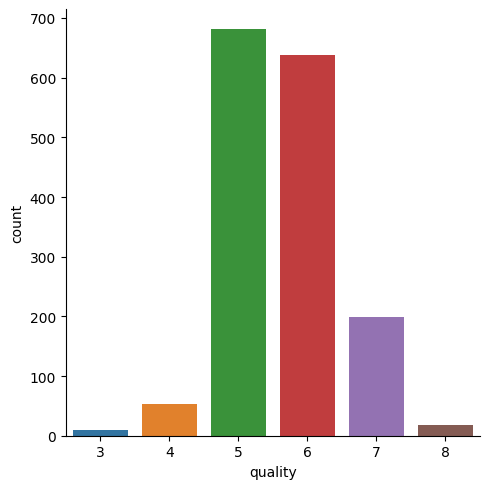

In [15]:
## Number of values for each wine quality
sns.catplot(x="quality", data=wine_dataset, kind="count")

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='quality', ylabel='volatile acidity'>

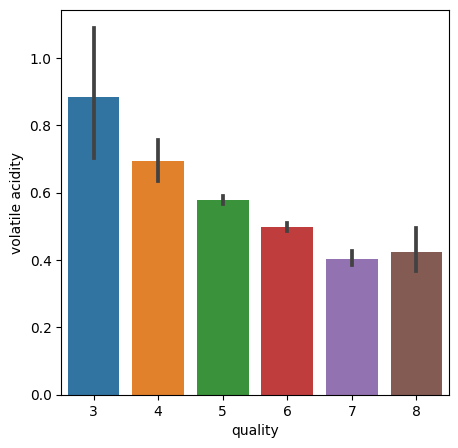

In [16]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5, 5))

sns.barplot(x="quality", y="volatile acidity", data=wine_dataset)

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='quality', ylabel='citric acid'>

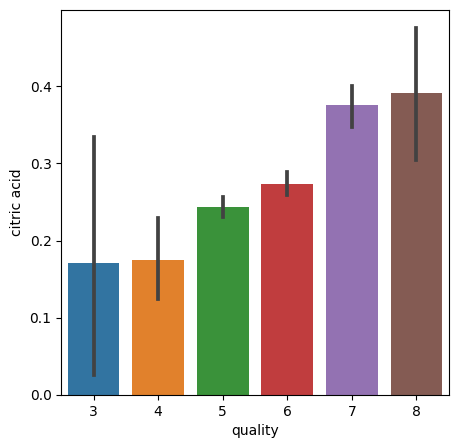

In [17]:
# citric acid vs quality
plot = plt.figure(figsize=(5, 5))

sns.barplot(x="quality", y="citric acid", data=wine_dataset)

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='quality', ylabel='residual sugar'>

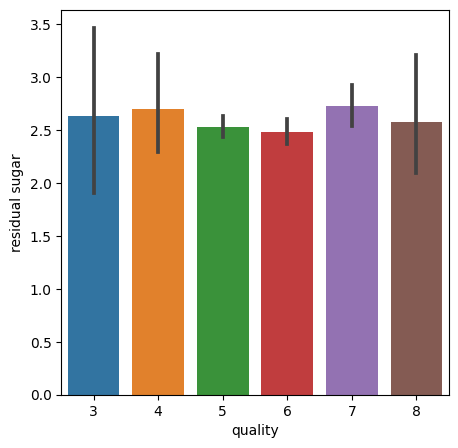

In [18]:
# residual sugar vs quality
plot = plt.figure(figsize=(5, 5))

sns.barplot(x="quality", y="residual sugar", data=wine_dataset)

### Correlation

1. Positive Correlation
2. Negative Correlation

In [9]:
coorelation = wine_dataset.corr()

<Axes: >

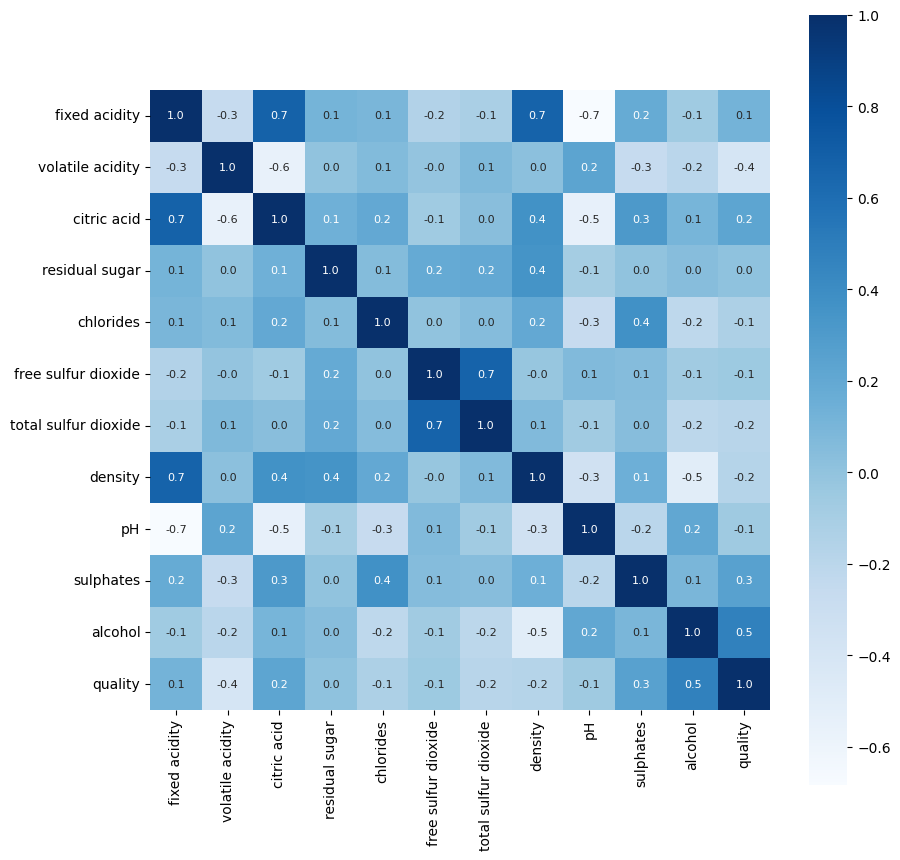

In [20]:
# constructing heat map to understand the correlation between the columns
plt.figure(figsize=(10, 10))

sns.heatmap(coorelation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size": 8}, cmap="Blues")

## Data Preprocessing

In [45]:
X = wine_dataset.drop("quality", axis=1)
y = wine_dataset["quality"]

In [24]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


## Label Binarization

In [55]:
y = wine_dataset["quality"].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [56]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

## Train test split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [58]:
(X.shape, X_train.shape, X_test.shape)

((1599, 11), (1279, 11), (320, 11))

### Training model

In [59]:
classifier = RandomForestClassifier()

In [60]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

### Model evaluation

In [61]:
## evaluating training dataset
y_train_predict = classifier.predict(X_train)
accuracy_score(y_train, y_train_predict)

1.0

In [62]:
## evaluating test dataset
y_test_predict = classifier.predict(X_test)
accuracy_score(y_test, y_test_predict)

0.946875

## Building Predictive system

In [63]:
raw_data = (7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)

input_data = np.asarray(raw_data)
input_data = input_data.reshape(1, -1)

result = classifier.predict(input_data)
print(result)


[0]


/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [64]:
result

array([0])